<a href="https://colab.research.google.com/github/neklyud/programming_miem/blob/master/generate_SAW_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Generate all lattice walks, 2D square lattice

In [0]:
# This I showed in class:

steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks(path, L):
    """Generate all random walks on the 2D square lattice."""
    if L == 0:
        print(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            pp = path.copy()
            pp.append((x + dx, y + dy))
            generate_walks(pp, L - 1)

In [0]:
generate_walks([(0, 0)], 2)

[(0, 0), (1, 0), (2, 0)]
[(0, 0), (1, 0), (0, 0)]
[(0, 0), (1, 0), (1, 1)]
[(0, 0), (1, 0), (1, -1)]
[(0, 0), (-1, 0), (0, 0)]
[(0, 0), (-1, 0), (-2, 0)]
[(0, 0), (-1, 0), (-1, 1)]
[(0, 0), (-1, 0), (-1, -1)]
[(0, 0), (0, 1), (1, 1)]
[(0, 0), (0, 1), (-1, 1)]
[(0, 0), (0, 1), (0, 2)]
[(0, 0), (0, 1), (0, 0)]
[(0, 0), (0, -1), (1, -1)]
[(0, 0), (0, -1), (-1, -1)]
[(0, 0), (0, -1), (0, 0)]
[(0, 0), (0, -1), (0, -2)]


## Store the walks

Printing walks is nice, but not very useful. Better construct a list of all walks, for postprocessing. To this end, add a `cache` parameter, which stores all generated walks.

In [0]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks_stored(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            pp.append(xy_new)
            generate_walks_stored(pp, L - 1, cache)

In [3]:
cache = []
generate_walks_stored([(0, 0)], 2, cache)
len(cache)

16

In [4]:
cache

[[(0, 0), (1, 0), (2, 0)],
 [(0, 0), (1, 0), (0, 0)],
 [(0, 0), (1, 0), (1, 1)],
 [(0, 0), (1, 0), (1, -1)],
 [(0, 0), (-1, 0), (0, 0)],
 [(0, 0), (-1, 0), (-2, 0)],
 [(0, 0), (-1, 0), (-1, 1)],
 [(0, 0), (-1, 0), (-1, -1)],
 [(0, 0), (0, 1), (1, 1)],
 [(0, 0), (0, 1), (-1, 1)],
 [(0, 0), (0, 1), (0, 2)],
 [(0, 0), (0, 1), (0, 0)],
 [(0, 0), (0, -1), (1, -1)],
 [(0, 0), (0, -1), (-1, -1)],
 [(0, 0), (0, -1), (0, 0)],
 [(0, 0), (0, -1), (0, -2)]]

## Task 0

Compute the average end-to-end distance of random walks of a given length. What is the scaling of the end-to-end distance with the length of the walk? What is the scaling of the mean *square* end-to-end distance with the length?

<font color='red'> (See in the papers, prove) </font>

In [0]:
import math
#Среднеквадротичное расстояние
def get_square_dist(cache):
  dist = 0
  for path in cache:
    start = path[0]
    finish = path[-1]
    dist += ((finish[0]-start[0])**2 + (finish[1]-start[1])**2)
  return dist/len(cache)


In [0]:
#Среднее расстояние

def get_dist(cache):
  dist = 0
  for path in cache:
    start = path[0]
    finish = path[-1]
    dist += math.sqrt((finish[0]-start[0])**2 + (finish[1]-start[1])**2)
  return dist/len(cache)

In [0]:

L_list = [ i for i in range(1,10)]
X = []
Y = []
X_square = []
Y_square = []
for L in L_list:
  cache = []
  generate_walks_stored([(0, 0)], L, cache)
  X.append(L)
  Y.append(get_dist(cache))
  X_square.append(L)
  Y_square.append(get_square_dist(cache))

Text(0, 0.5, '$y$')

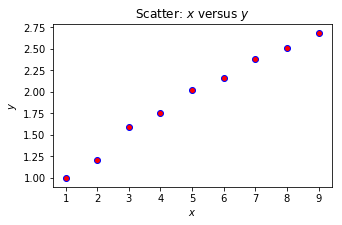

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=X, y=Y, marker='o', c='r', edgecolor='b')
ax.set_title('Scatter: $x$ versus $y$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0, 0.5, '$y$')

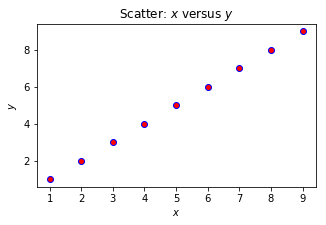

In [9]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=X_square, y=Y_square, marker='o', c='r', edgecolor='b')
ax.set_title('Scatter: $x$ versus $y$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# I. Generate all SAWs on a 2D square lattice

A self-avoiding walk is a random walk where a lattice site can only be visited once.

In [0]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_SAWs(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            if xy_new not in path:
              pp.append(xy_new)
              generate_SAWs(pp, L - 1, cache)

## Task 1

How many walks of a given length are there? What is the mean end-to-end distance of walks of a given length? What is mean *square* of the end-to-end distance?

<font color='red'> (See in the papers, prove) </font>

In [11]:
cache = []
generate_SAWs([(0, 0)], 2, cache)
len(cache)#Количество SAW проходов

12

In [12]:
get_dist(cache)#среднее расстояние 

1.6094757082487303

In [13]:
get_square_dist(cache)

2.6666666666666665

## Extra tasks (for fun, no credit, a possible basis of a course project)

1. Generate a self-avoiding walk on triangular lattice <font color='red'> (a link or a hint) </font>.
2. Rewrite the recursive algorithm to use a queue <font color='red'> (a link or a hint) </font>.